# NFL Pass Rush and YAC

In [1]:
import nfl_data_py as nfl
import pandas as pd
import os
import urllib.request
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

In [2]:
pbp = nfl.import_pbp_data([2022])

2022 done.
Downcasting floats.


In [3]:
pbp.shape

(50147, 384)

In [4]:
pbp.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,offense_players,defense_players,n_offense,n_defense
0,1.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,None,None,None,...,None,None,NaN,None,NaN,,,,0,0
1,43.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,None,None,NaN,None,NaN,47969;53059;42500;46279;53575;48364;46253;5460...,00-0036157;00-0035202;00-0037984;00-0029597;00...,00-0035537;00-0032134;00-0034419;00-0036500;00...,11,11
2,68.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,SINGLEBACK,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",NaN,53536;43586;53443;42371;42500;44999;43433;3309...,00-0036924;00-0032466;00-0036979;00-0032234;00...,00-0033294;00-0026190;00-0032574;00-0028278;00...,11,11
3,89.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,SHOTGUN,"1 RB, 2 TE, 2 WR",6.0,"3 DL, 4 LB, 4 DB",4.0,53536;43586;42371;53443;42500;44999;43433;3309...,00-0036924;00-0032466;00-0032234;00-0036979;00...,00-0033294;00-0026190;00-0032574;00-0028278;00...,11,11
4,115.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,SINGLEBACK,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",NaN,53536;43586;53443;42371;42500;44999;43433;3309...,00-0036924;00-0032466;00-0036979;00-0032234;00...,00-0033294;00-0026190;00-0032574;00-0028278;00...,11,11


In [5]:
pbp.columns

Index(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       ...
       'offense_formation', 'offense_personnel', 'defenders_in_box',
       'defense_personnel', 'number_of_pass_rushers', 'players_on_play',
       'offense_players', 'defense_players', 'n_offense', 'n_defense'],
      dtype='object', length=384)

In [6]:
pbp.dtypes

play_id            float32
game_id             object
old_game_id         object
home_team           object
away_team           object
                    ...   
players_on_play     object
offense_players     object
defense_players     object
n_offense            int32
n_defense            int32
Length: 384, dtype: object

In [7]:
# just get run and pass plays

pbp_rp = pbp[(pbp['pass'] == 1) | (pbp['rush'] == 1)]
pbp_rp = pbp_rp.dropna(subset = ['epa', 'posteam', 'defteam'])
pbp_rp.shape

(36863, 384)

In [8]:
# top pass offenses

pass_epa = pbp_rp[(pbp['pass'] == 1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa' : 'pass_epa'})

pass_epa.sort_values('pass_epa', ascending = False)

C:\Users\ZLH12\AppData\Local\Temp\ipykernel_10768\183739708.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pass_epa = pbp_rp[(pbp['pass'] == 1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa' : 'pass_epa'})


,posteam,pass_epa
15,KC,0.280231
28,SF,0.179196
10,DET,0.174694
3,BUF,0.162691
6,CIN,0.149930
25,PHI,0.130672
14,JAX,0.110617
8,DAL,0.101407
19,MIA,0.087106
20,MIN,0.081581


In [9]:
#top rush offenses

rush_epa = pbp_rp[(pbp_rp['rush'] == 1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa' : 'rush_epa'})

#merge pass and rush datasets

epa = pd.merge(pass_epa, rush_epa, on = 'posteam')

epa.head()

,posteam,pass_epa,rush_epa
0,ARI,-0.079506,-0.079682
1,ATL,0.002979,0.006186
2,BAL,-0.010278,0.015354
3,BUF,0.162691,-0.052620
4,CAR,-0.063714,-0.006957


In [10]:
# get logos

logos = nfl.import_team_desc()[['team_abbr', 'team_logo_espn']]

logos.head()

,team_abbr,team_logo_espn
0,ARI,https://a.espncdn.com/i/teamlogos/nfl/500/ari.png
1,ATL,https://a.espncdn.com/i/teamlogos/nfl/500/atl.png
2,BAL,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png
3,BUF,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png
4,CAR,https://a.espncdn.com/i/teamlogos/nfl/500-dark...


In [11]:
#set up paths where logos come from

logo_paths = []

team_abbr = []

if not os.path.exists('logos'):
    os.makedirs('logos')
    
for team in range(len(logos)):
    urllib.request.urlretrieve(logos['team_logo_espn'][team], f"logos/{logos['team_abbr'][team]}.tif")
    logo_paths.append(f"logos/{logos['team_abbr'][team]}.tif")
    team_abbr.append(logos['team_abbr'][team])

data = {'team_abbr': team_abbr, 'logo_path' : logo_paths}

logo_data = pd.DataFrame(data)

#merge epa and logos while matching posteam to team_abbr

epa_with_logos = pd.merge(epa, logo_data, left_on = 'posteam', right_on = 'team_abbr')

In [12]:
epa_with_logos

,posteam,pass_epa,rush_epa,team_abbr,logo_path
0,ARI,-0.079506,-0.079682,ARI,logos/ARI.tif
1,ATL,0.002979,0.006186,ATL,logos/ATL.tif
2,BAL,-0.010278,0.015354,BAL,logos/BAL.tif
3,BUF,0.162691,-0.052620,BUF,logos/BUF.tif
4,CAR,-0.063714,-0.006957,CAR,logos/CAR.tif
5,CHI,-0.074289,-0.002024,CHI,logos/CHI.tif
6,CIN,0.149930,-0.049671,CIN,logos/CIN.tif
7,CLE,0.018411,0.004358,CLE,logos/CLE.tif
8,DAL,0.101407,-0.034671,DAL,logos/DAL.tif
9,DEN,-0.050991,-0.121433,DEN,logos/DEN.tif


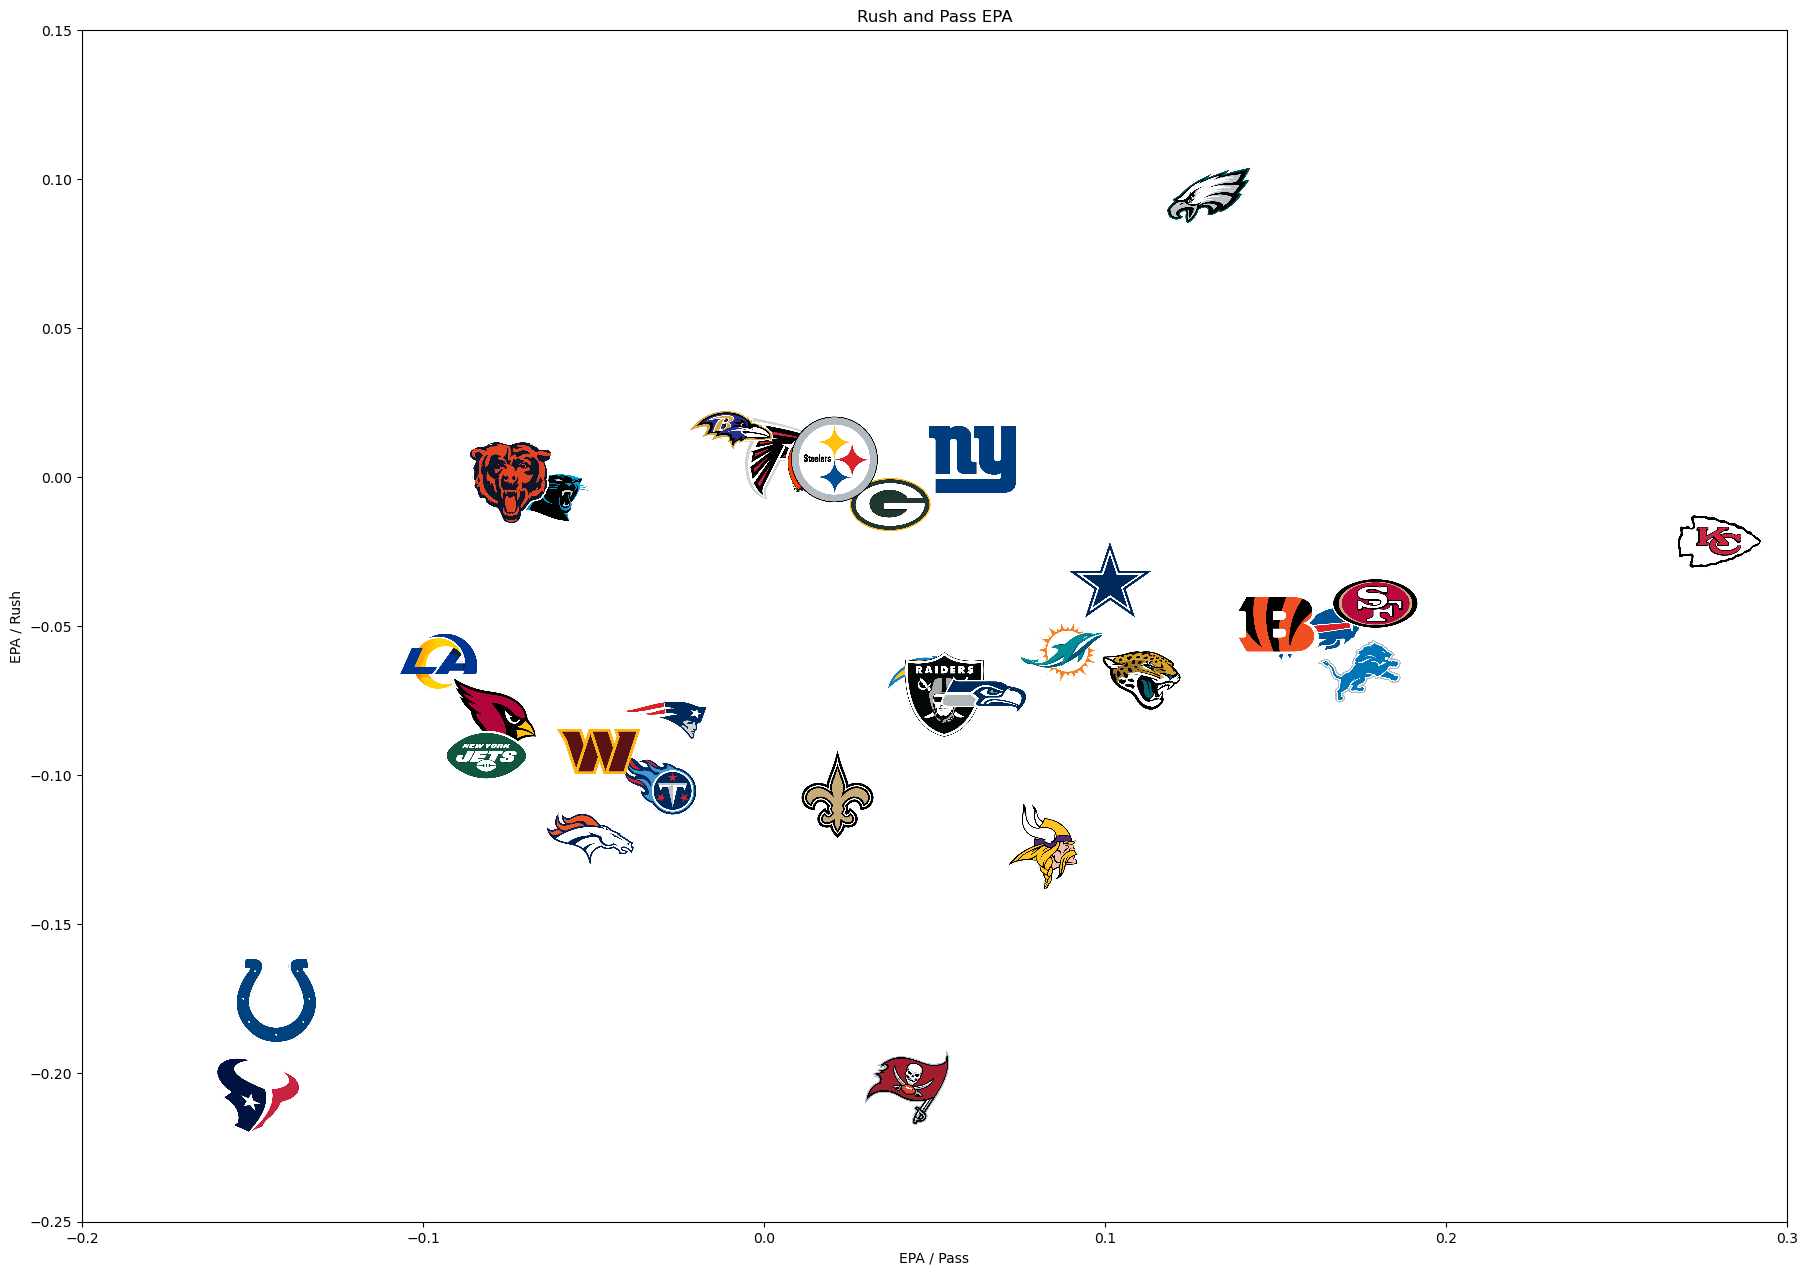

In [16]:
plt.rcParams['figure.figsize'] = [20, 14]
plt.rcParams['figure.autolayout'] = True

def getImage(path):
    return OffsetImage(plt.imread(path, format = 'tif'), zoom = .13)

x = epa_with_logos['pass_epa']
y = epa_with_logos['rush_epa']
paths = epa_with_logos['logo_path']

fig, ax = plt.subplots()

for x0, y0, path in zip(x, y, paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon = False)
    ax.add_artist(ab)

# set axis limits

plt.xlim(-0.2, 0.3)
plt.ylim(-0.25, 0.15)

#set labels
plt.title('Rush and Pass EPA')
plt.xlabel("EPA / Pass")
plt.ylabel('EPA / Rush')

plt.show()

In [17]:
#rec Yac Bar Graph

receiver_yac = pbp_rp[(pbp_rp['pass'] == 1)].groupby('receiver_player_name').agg({'pass' : 'count', 
    'yards_after_catch' : 'sum'}).reset_index().rename(columns = {'pass': 'targets', 'yards_after_catch': 'yac'})

#filter to just players with over 100 targets

receiver_yac = receiver_yac[(receiver_yac)['targets']>=100]

#sort

receiver_yac.sort_values('yac', inplace = True)

In [18]:
receiver_yac

,receiver_player_name,targets,yac
87,C.Sutton,109,152.0
174,G.Davis,106,153.0
26,A.Thielen,113,157.0
130,D.Moore,118,182.0
80,C.Olave,120,210.0
143,D.Schultz,107,222.0
124,D.London,118,231.0
331,M.Evans,140,233.0
16,A.Lazard,101,248.0
125,D.Metcalf,156,262.0


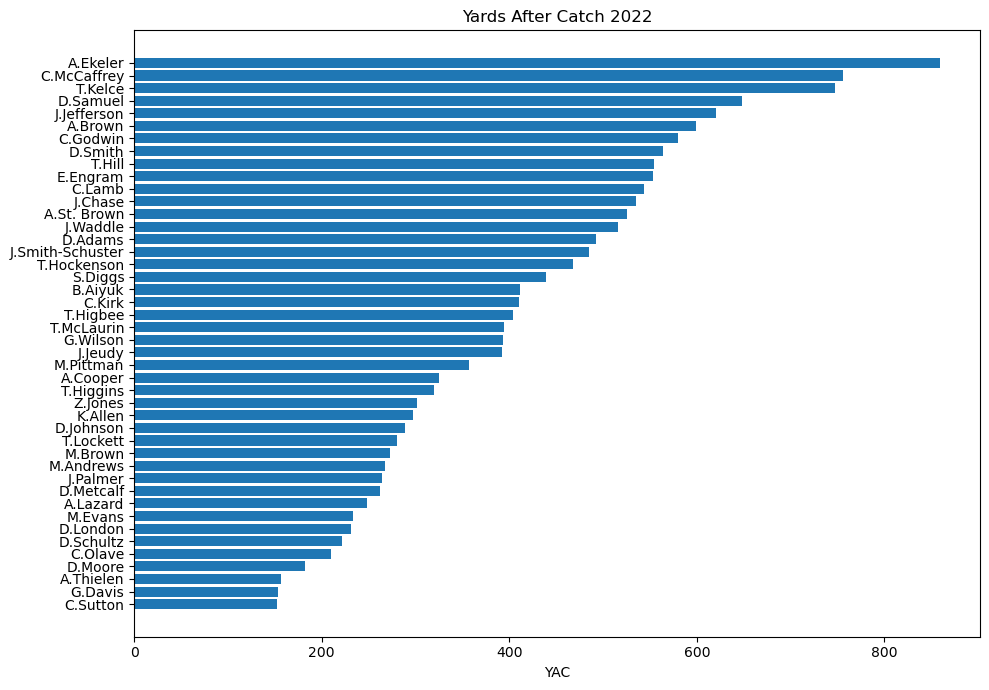

In [19]:
name = receiver_yac['receiver_player_name']
yac = receiver_yac['yac']

fig, ax = plt.subplots(figsize = (10, 7))

ax.barh(name,yac)
ax.set_title('Yards After Catch 2022')
ax.set_xlabel('YAC')

plt.show()